### 트랜스포머 모델 종류
인코더, 디코더, 인코더-디코더 구조에서 출력하는 결과는 모두 동일한 형태의 은닉 벡터
->  세 구조의 출력 형태가 같기 때문에, 특정 작업에 따라 적절한 구조 선택 가능

인코더 기반 모델
- 텍스트 분류 : 입력된 문장이 긍정적인지 부정적인지 예측
- 개체명 인식 :  텍스트에서 사람 이름, 지역명, 회사 이름 등의 고유 명사를 식별
- STS :  두 텍스트의 유사도 측정
- BERT, RoBERT, ELECTRA 등

인코더-디코더 모델
- 시퀀스-투-시퀀스 작업 : 요약과 번역, QA
- T5, BART 등

디코더 기반 모델
- 뛰어난 텍스트 생성 능력 -> 챗봇, 질문 답변, 요약, 번역 등
- GPT-3, ChatGPT 등
- 디코더는 이전까지 생성한 텍스트를 입력으로 받아 다음 토큰을 예측 -> 프롬프트 : 이전에 생성한 텍스트인 것처럼 전달하는 초기 텍스트



### 언어 모델의 주요 발전 과정

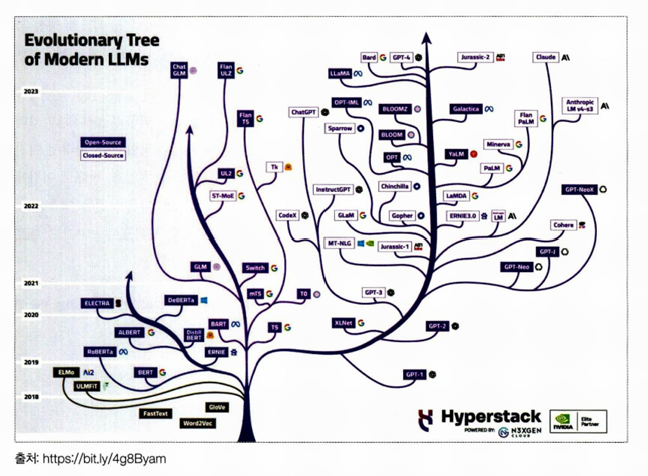

전이학습 : 이미 훈련된 모델을 새로운 작업에 맞춰 재사용하거나 약간 조정하여 사용하는 방법

#### BART 모델
- 2019년 메타에서 공개한 트랜스포머 기반의 인코더-디코더 언어 모델
- 베이스 모델은 인코더와 디코더 블록을 각각 6개씩 사용하며, 라지 모델은 12개씩 사용

##### BART 베이스 모델의 전체 구조
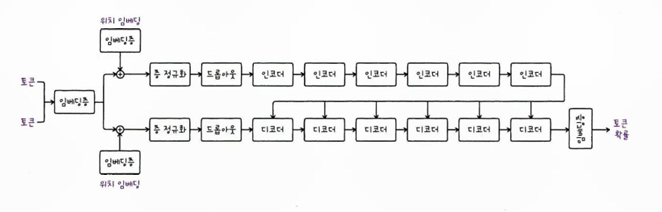
- 하나의 공통된 단어 임베딩 층을 사용하여 인코더와 디코더가 동일한 방식으로 토큰을 변환하도록 설계 됨
-  위치 임베딩 : 위치 정숫값을 실수 벡터 표현으로 바꾸기 위해 임베딩 층을 사용

임베딩 층의 모델 파라미터를 사용해 디코더의 출력 벡터를 각 토큰에 대한 확률로 변환

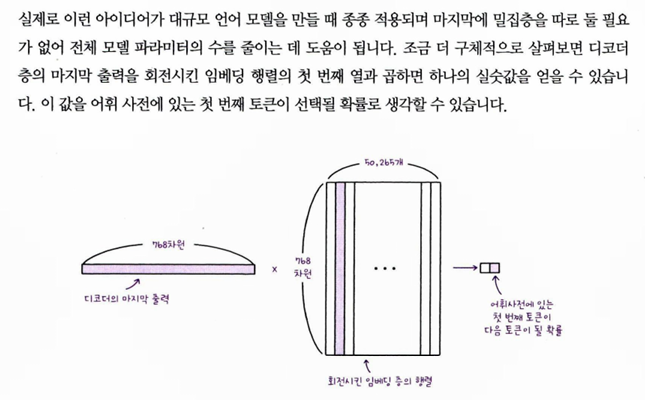

##### BART의 인코더와 디코더
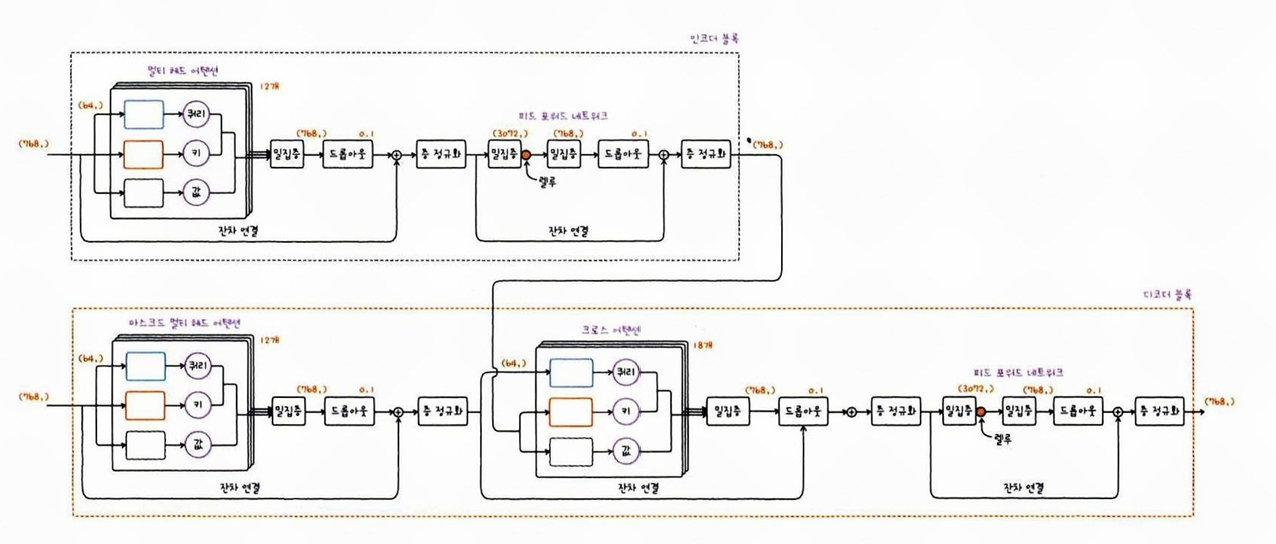

- 원본 트랜스포머 구조와 다른 점 : 피드포워드 네트워크에서 렐루 활성화 함수 
대신 젤루 함수를 사용
- 젤루 함수 : 입력에 표준 정규 분포의 누적 분포 함수를 곱함
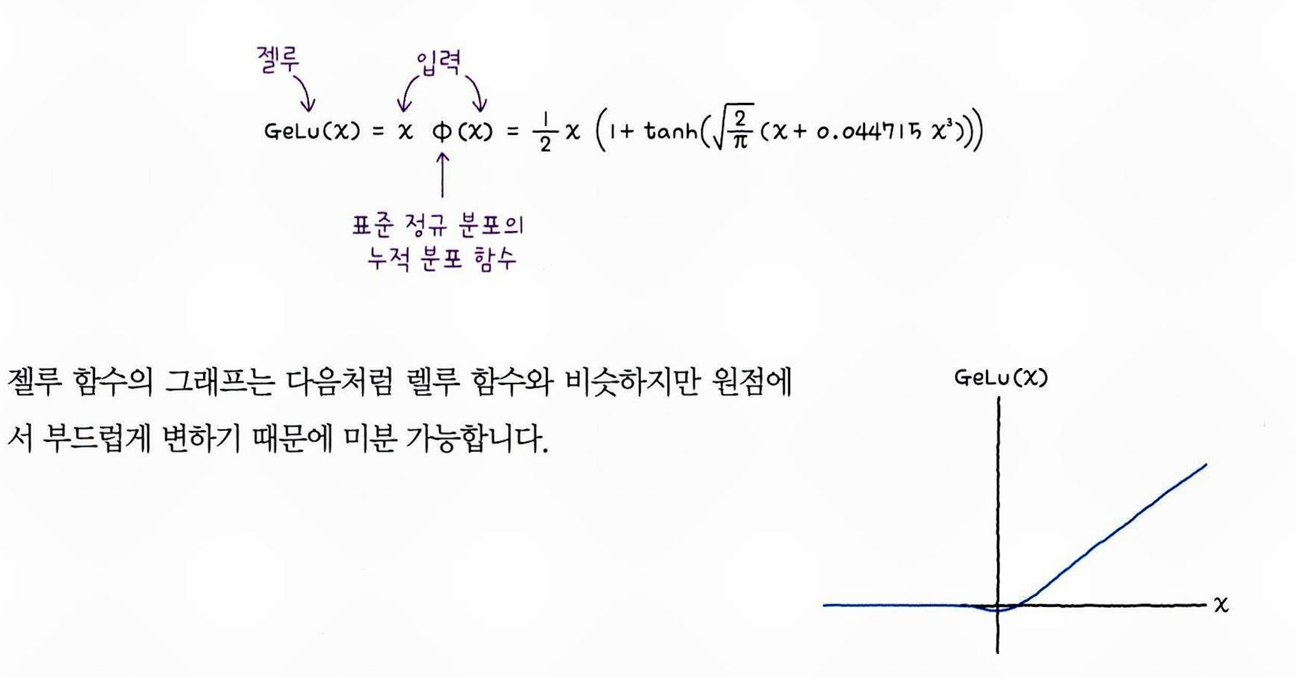

#### 허깅페이스로 KoBART 모델 로드
- KoBART : SKT에서 만든 BART 기반의 한국어 인코더-디코더 모델
- 허깅페이스 : 트랜스포머 모델을 쉽게 사용하고 훈련하기 위한 transformers 패키지를 만든 회사

In [1]:
from transformers import pipeline
# task 매개변수에 지정할 수 있는 다른 옵션 : https://bit.ly/3D0BLxW 참고
# 코랩의 T4 GPU 하나를 사용한다고 가정하므로 device=0으로 지정
pipe = pipeline(task='summarization', device=0)

2025-12-12 10:30:33.649635: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-12 10:30:34.283059: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-12 10:30:36.908458: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (htt

In [2]:
# 앞의 코드와 동일한 작업 수행
# 모델 이름은 https：//huggingface.co/ 다음에 나오는 경로를 나타냄
# CNN 텍스트 데이터셋에서 미세 튜닝된 모델, 텍스트를 56〜142자 사이의 길이로 요약 - min_length와 max_length로 범위 변경 가능
pipe = pipeline(task='summarization', model='sshleifer/distilbart-cnn-12-6', device=0)

Device set to use cuda:0


In [3]:
# 반 고흐에 관한 위키백과 텍스트 요약
sample_text = """Vincent Willem van Gogh was a Dutch Post-Impressionist 
painter who is among the most famous and influential figures in the history 
of Western art. In just over a decade, he created approximately 2100 
artworks, including around 860 oil paintings, most of them in the last two 
years of his life. His oeuvre includes landscapes, still lifes, portraits, 
and self-portraits, most of which are characterised by bold colours and 
dramatic brushwork that contributed to the rise of expressionism in modern
art. Van Gogh's work was beginning to gain critical attention before he died 
from a self-inflicted gunshot at age 37. During his lifetime, only one of 
Van Gogh’s paintings. The Red Vineyard, was sold. 
"""
pipe(sample_text)

[{'summary_text': " Vincent Willem van Gogh was a Dutch Post-Impressionist painter who is among the most famous and influential figures in the history of Western art . His oeuvre includes landscapes, still lifes, portraits,  \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0and self-portraits . Van Gogh's work was beginning to gain critical attention before he died aged 37 from a self-inflicted gunshot ."}]

In [4]:
# 한국어 데이터셋으로 미세 튜닝한 모델을 파이프라인 함수를 통해 로드
# 최대 300자까지 요약
kobart = pipeline(task='summarization', model='EbanLee/kobart-summary-v3', device=0)

You passed `num_labels=3` which is incompatible to the `id2label` map of length `2`.
You passed `num_labels=3` which is incompatible to the `id2label` map of length `2`.
Device set to use cuda:0


In [5]:
ko_text = """
하나, ‘입문자 맞춤형 7단계 구성’을 따라가며 체계적으로 반복하는 탄탄한 학습 설계!
이 책은 데이터 분석의 핵심 내용을 7단계에 걸쳐 반복 학습하면서 자연스럽게 머릿속에 기억되도록 구성했습니다. [핵심 키워드]와 [시작하기 전에]에서 각 절의 주제에 대한 대표 개념을 워밍업하고, 이론과 실습을 거쳐 마무리에서는 [핵심 포인트]와 [확인 문제]로 한번에 복습합니다. ‘혼자 공부할 수 있는’ 커리큘럼을 그대로 믿고 끝까지 따라가다 보면 데이터 분석 공부가 난생 처음인 입문자도 무리 없이 책을 끝까지 마칠 수 있습니다!
둘, 실제로 일어날 법한 흥미로운 스토리에 담긴 문제를 직접 해결하며 익히는 ‘진짜’ 데이터 분석!
현장감 넘치는 스토리를 통해 데이터를 다루는 방법을 알려 주어 ‘파이썬’과 ‘데이터’가 낯설어도 몰입감 있는 학습을 할 수 있도록 구성했습니다. 이 책에서는 API와 웹 스크래핑을 통해 실제 도서관 데이터와 온라인 서점 웹사이트에서 데이터를 가져오는 등 내 주변에 있는 데이터를 직접 수집할 수 있는 방법을 가이드합니다. 또한 판다스, 넘파이, 맷플롯립 등 데이터 분석에 유용한 각종 파이썬 라이브러리를 활용해 보며 코딩 감각을 익히고, 핵심 통계 지식으로 기본기를 탄탄하게 다질 수 있습니다. 마지막에는 분석을 바탕으로 미래를 예측하는 머신러닝까지 맛볼 수 있어 데이터 분석의 처음부터 끝까지 제대로 배울 수 있습니다.
셋, ‘혼공’의 힘을 실어줄 동영상 강의와 혼공 학습 사이트 지원!
책으로만 학습하기엔 여전히 어려운 입문자를 위해 저자 직강 동영상도 지원합니다. 또한 학습을 하며 궁금한 사항은 언제든지 저자에게 질문할 수 있도록 학습 사이트를 제공합니다. 저자가 질문 하나하나에 직접 답변을 달아 주는 것은 물론, 관련 최신 기술과 정보도 얻을 수 있습니다. 게다가 혼자 공부하고 싶지만 정작 혼자서는 자신 없는 사람들을 위해 혼공 학습단을 운영합니다. 혼공 학습단과 함께하면 마지막까지 포기하지 않고 완주할 수 있을 것입니다.
▶ https://hongong.hanbit.co.kr
▶ https://github.com/rickiepark/hg-da
넷, 언제 어디서든 가볍게 볼 수 있는 혼공 필수 [용어 노트] 제공!
꼭 기억해야 할 핵심 개념과 용어만 따로 정리한 [용어 노트]를 제공합니다. 처음 공부하는 사람들이 프로그래밍을 어려워하는 이유는 낯선 용어 때문입니다. 그러나 어려운 것이 아니라 익숙하지 않아서 헷갈리는 것이므로, 용어나 개념이 잘 생각나지 않을 때는 언제든 부담 없이 [용어 노트]를 펼쳐 보세요. 제시된 용어 외에도 새로운 용어를 추가하면서 자신만의 용어 노트를 완성해가는 과정도 또 다른 재미가 될 것입니다.
"""

kobart(ko_text)

[{'summary_text': '이 책은 데이터 분석의 핵심 내용을 7단계에 걸쳐 반복 학습하면서 머릿속에 기억되도록 구성했습니다. 독자 공부할 수 있는 커리큘럼을 그대로 믿고 끝까지 따라가다 보면 데이터 분석 공부가 난생 처음인 입문자도 무리 없이 책을 끝까지 마칠 수 있습니다. 현장감 넘치는 스토리를 통해 데이터를 다루는 방법을 알려 주어 몰입감 있는 학습을 할 수 있도록 구성했습니다. 저자가 질문 하나하나에 직접 답변을 달아 주는 것은 물론, 최신 기술과 정보도 얻을 수 있습니다. 혼공 학습단과 함께하면 마지막까지 포기하지 않고 완주할 수 있을 것입니다. '}]

#### 텍스트 토큰화
- 토큰화: 텍스트를 토큰이라는 단위로 분할하는 과정
- 트랜스포머 모델은 이미 텍스트가 토큰으로 분할되고 각 토큰에 정수 아이디가 할당된 후 이 정수 리스트가 전달된다고 가정
- 토크나이저 : 토큰화를 수행하는 모델 (훈련 데이터로부터 최적의 어휘 사전을 학습)
- 부분단어 토큰화 방법 : BPE(Byte-Pair Encoding), 워드피스, 유니그램, 센텐스피스

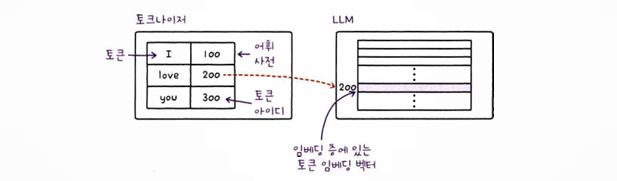

##### BPE
- 각 단어를 문자 단위로 분해하여 어휘 사전에 추가한 후, 가장 많이 등장하는 순서대로 문자 쌍（또는 부분단어 쌍）을 찾아 병합, 합쳐진 부분단어를 어휘 사전에 추가
- BPE 알고리즘의 단점 : 유니코드 문자를 처리할 때 어휘 사전의 크기가 매우 커질 수 있음

##### 바이트 수준의 BPE
- 적절한 수준의 어휘 사전 크기에서 유니코드를 처리할수 있는 방법
- 텍스트를 바이트 스트림으로 인식하고 자주 등장하는 바이트 쌍을 어휘사전에 추가

In [6]:
# kobart 모델의 어휘 사전 크기 확인
print(kobart.tokenizer.vocab_size)

30000


In [ ]:
# 위와 동일 결과, 토크나이저 객체에 len() 함수를 적용
len(kobart.tokenizer)

30000

In [ ]:
# 위와 동일 결과, vocab 속성을 통해 전체 어휘 사전 가져오기
vocab = kobart.tokenizer.vocab
len(vocab)

30000

In [ ]:
# vocab 변수는 단순한 파이썬 딕셔너리
# 각 튜플은 토큰와 토큰 아이디의 쌍으로 이루어져 있음
# _ 문자는 공백을 의미 -> 단어의 시작 부분
list(vocab.items())[:10]

[('▁년', 16224),
 ('▁간다.\n', 28424),
 ('▁부친', 23516),
 ('모', 10607),
 ('얻', 11770),
 ('국장은', 24409),
 ('▁수사', 15413),
 ('회의를', 18809),
 ('韋', 8554),
 ('▁이듬', 24704)]

In [10]:
# 샘플 텍스트를 직접 토큰으로 나누기
tokens = kobart.tokenizer.tokenize('혼자 만들면서 공부하는 딥러닝')
print(tokens)

['▁혼자', '▁만들', '면서', '▁공부', '하는', '▁', '딥', '러', '닝']


In [11]:
# 각 토큰에 해당하는 토큰 아이디 찾기
kobart.tokenizer.convert_tokens_to_ids(tokens)

[16814, 14397, 14125, 16962, 14049, 1700, 10021, 10277, 9747]

In [ ]:
# 문자열에서 토큰 아이디 리스트 바로 생성
token_ids = kobart.tokenizer.encode('혼자 만들면서 공부하는 딥러닝')
print(token_ids)
# 맨 앞과 뒤의 토큰 아이디 0과 1 -> 문자열의 시작과 끝을 나타냄

[0, 16814, 14397, 14125, 16962, 14049, 1700, 10021, 10277, 9747, 1]


In [13]:
# 토큰 아이디를 토큰으로 바꿔주는 convert_ids_to_tokens() 메서드
tokens = kobart.tokenizer.convert_ids_to_tokens(token_ids)
print(tokens) 

['<s>', '▁혼자', '▁만들', '면서', '▁공부', '하는', '▁', '딥', '러', '닝', '</s>']


In [14]:
# 토큰 리스트를 원래 문자열로 복원
kobart.tokenizer.decode(token_ids)

'<s> 혼자 만들면서 공부하는 딥러닝</s>'

##### 워드피스
- 훈련 데이터셋에 있는 모든 문자가 포함된 어휘 사전으로 시작해서 가장 많이 등장하는 부분단어 쌍을 어휘 사전에 추가
- BPE는 단순히 가장 많이 등장하는 부분단어를 선택하지만 워드피스는 부분단어를 구성하는 개별 토큰의 빈도도 고려
- 워드피스를 사용하는 대표적인 LLM : BERT

##### 유니그램
- 초기에 매우 큰 어휘 사전을 만든 다음 사전에 지정한 어휘 사전 크기에 도달할 때까지 점진적으로 토큰을 제거
- 초기 어휘 사전은 공백으로 나누어진 단어를 부분단어로 쪼개어 추가하거나 BPE 알고리즘을 적용하여 생성
- 센텐스피스와 함께 사용

##### 센텐스피스
- 텍스트를 공백 등을 기준으로 단어로 나누는 사전 토큰화를 사용하지 않는 방법
- 원시 입력 텍스트를 그대로 사용하며 공백을 문자의 하나로 간주
- 실제 어휘 사전 구성은 BPE나 유니그램 알고리즘을 사용



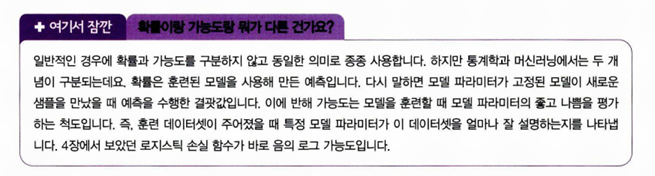